In [1]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound
from scipy.fftpack import fft 
import pyaudio as pa
import struct
import scipy

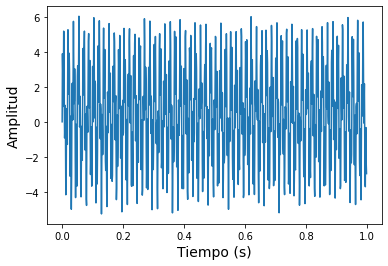

In [2]:
Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x)
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

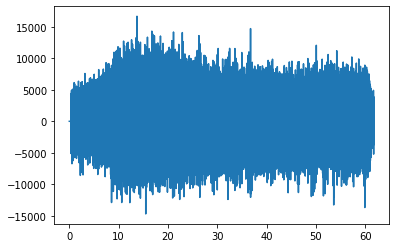

In [3]:
    filename='C:/Users/yuher/OneDrive/Escritorio/curso python principiante/lwd/ProcesamientoDatos-master/Scripts/7.data/WhatsApp-Audio-2022-08-02-at-11.44.43-AM.wav'                                
    winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

    Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
    Audio_m = data[:,0]              

    L = len(Audio_m)                                      # Tomamos la longitud de la señal

    n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

    plt.plot(n,Audio_m)
    plt.show()

In [4]:
print(Audio_m)

[   0    0    0 ...  761 1396 2153]


In [5]:
gn = [Audio_m] # Definimos una función en tiempo discreto
gk = fourier.fft(gn)      # Calculamos la FFT
gk

array([[-267274.            -0.j        ,
         -65179.44419531+89918.92925336j,
         -63128.24391996 -1320.23528494j, ...,
         -76543.76427464-34466.38541526j,
         -63128.24391996 +1320.23528494j,
         -65179.44419531-89918.92925336j]])

In [7]:
def fourier_function(x, Fs):
    xf = np.zeros(len(x), dtype=complex)
    for m in range(0, len(x)):
        for n in range(0, len(x)):
            xf[m] = xf[m] + x[n]*np.exp(-2j*np.pi*n*m/Fs)
    return xf

In [ ]:
fourier_function(Audio_m,Fs)